## Two-phase Cahn-Hilliard solvers

In [1]:
import voxelsss as vox
import numpy as np

Initialize field with random noise

In [2]:
nx, ny, nz = [100, 100, 100]

sim = vox.VoxelFields(nx, ny, nz, (nx,ny,nz))
noise = 0.5 + 0.1*np.random.rand(nx, ny, nz)

### Euler explicit

Solve spinodal decomposition starting from random noise until time 100.
The optional argument 'variable_m' determines which sort of mobility is used.
 - variable_m= False: mobility = D_0
 - variable_m= True:  mobility = D_0 * c * (1-c)

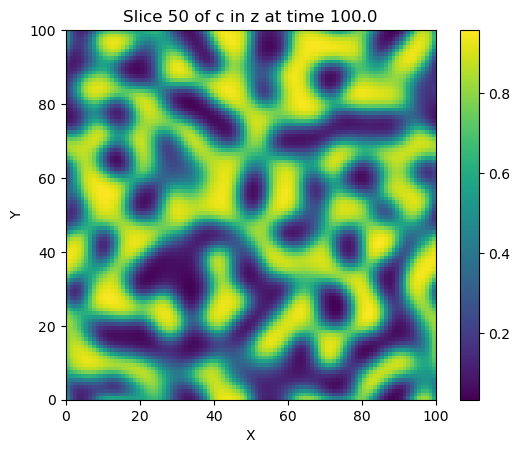

Wall time: 48.4409 s (0.0024 s/iter)
GPU-RAM currently allocated 21.22 MB (44.04 MB reserved)
GPU-RAM maximally allocated 38.19 MB (44.04 MB reserved)


In [3]:
%matplotlib inline
dt = 0.005
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
# a.solve(variable_m = False, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
a.solve(variable_m = True, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
reference = sim.fields["c"]


### Semi-implicit FFT solver

The semi-implicit scheme allows for much larger timesteps.
In this case, the *add_field* overwrites the previous solver solution with the initial noise field befor the start of the simulation.

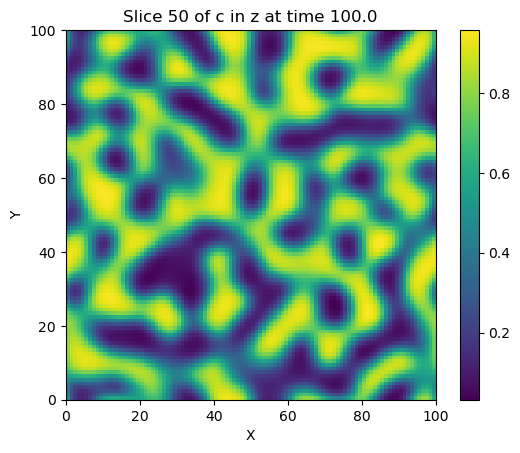

Wall time: 7.1402 s (0.0071 s/iter)
GPU-RAM currently allocated 58.92 MB (106.95 MB reserved)
GPU-RAM maximally allocated 83.89 MB (106.95 MB reserved)


In [4]:
%matplotlib inline
dt = 0.1
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
# a.solve_FFT(variable_m=False, time_increment=dt, max_iters=iter, frames=20, verbose='plot', vtk_out=False)
a.solve_FFT(variable_m=True, time_increment=dt, max_iters=iter, frames=30, verbose='plot', vtk_out=False)

Plot the field in interactive mode to look at the third dimension

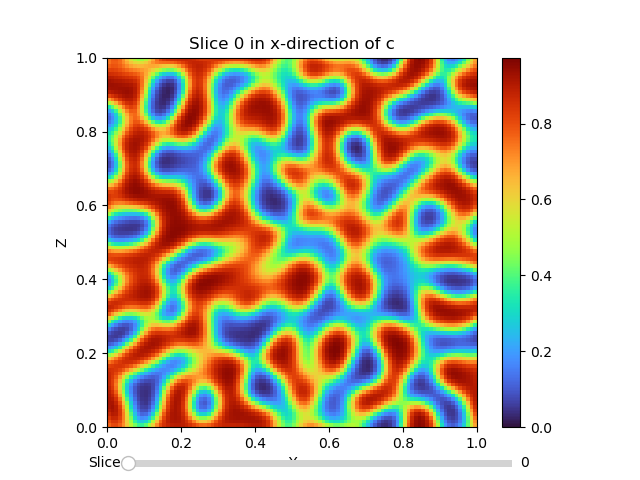

In [5]:
%matplotlib widget
sim.plot_field_interactive("c", direction='x', colormap='turbo')

0.13663167


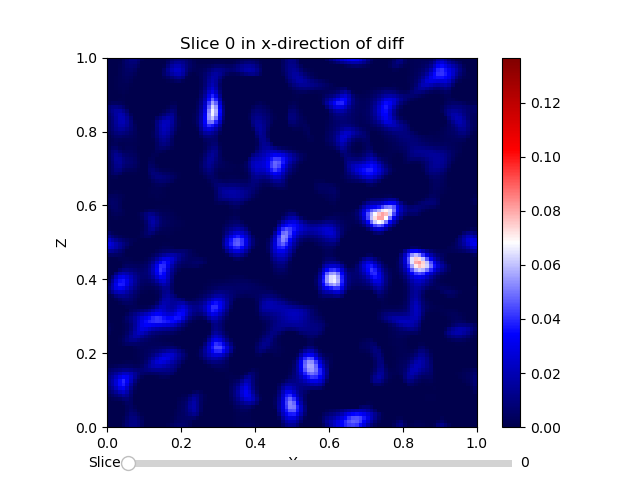

In [6]:
%matplotlib widget
difference = sim.fields["c"]-reference
sim.add_field("diff", difference)
sim.plot_field_interactive("diff", colormap='seismic')
print(np.max(np.abs(difference)))